In [4]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


Data Shape: (1000, 2)
Class Distribution: [510 490]
Feature Statistics:
                 0            1
count  1000.000000  1000.000000
mean     -0.001541    -0.032069
std       0.711643     0.712037
min      -1.257403    -1.272887
25%      -0.682578    -0.729423
50%       0.005545    -0.050030
75%       0.702900     0.645088
max       1.190685     1.231560

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       106
           1       0.98      0.97      0.97        94

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200


Model Accuracy: 0.9750


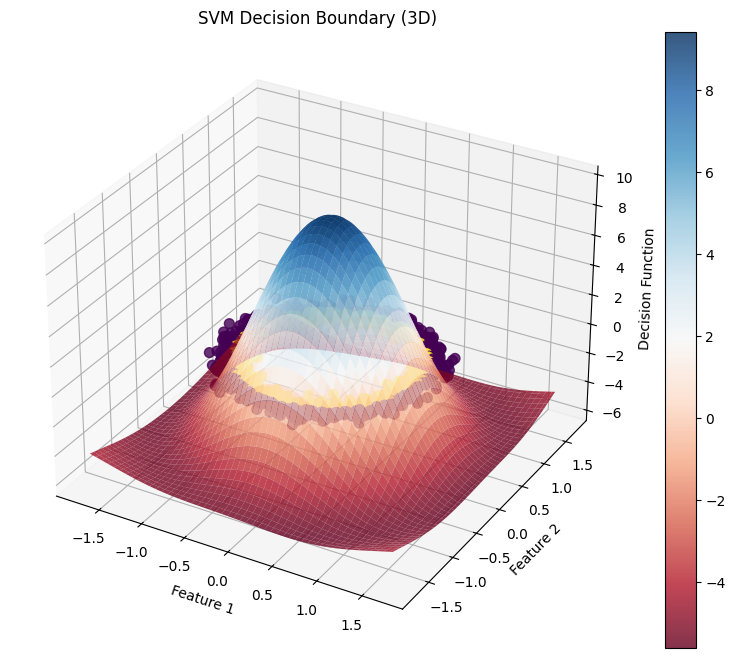

Model saved to svm_model.pkl
Scaler saved to scaler.pkl


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# 1. Business Understanding
"""
Goal: Implement SVM classifier for circular data distribution
Success Criteria: Accuracy > 0.9
Target Users: Data scientists and analysts
"""

# 2. Data Understanding
def generate_circular_data(n_samples=1000, noise=0.1):
    """Generate synthetic circular data for classification"""
    np.random.seed(42)
    r = np.random.normal(1, noise, n_samples)
    theta = np.random.uniform(0, 2*np.pi, n_samples)

    X1 = r * np.cos(theta)
    X2 = r * np.sin(theta)
    X = np.column_stack([X1, X2])
    y = (np.sqrt(X1**2 + X2**2) <= 1).astype(int)

    return X, y

def analyze_data(X, y):
    """Basic data analysis"""
    print("Data Shape:", X.shape)
    print("Class Distribution:", np.bincount(y))
    print("Feature Statistics:")
    print(pd.DataFrame(X).describe())

# 3. Data Preparation
def prepare_data(X, y):
    """Scale features and split data"""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# 4. Modeling
def train_svm(X_train, y_train, kernel='rbf'):
    """Train SVM model"""
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    return svm

# 5. Evaluation
def evaluate_model(model, X_test, y_test):
    """Evaluate model performance"""
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    return model.score(X_test, y_test)

def visualize_3d(X, y, model, scaler):
    """Create 3D visualization of decision boundary"""
    margin = 0.5
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    X_mesh_scaled = scaler.transform(X_mesh)
    Z = model.decision_function(X_mesh_scaled)
    Z = Z.reshape(xx.shape)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(xx, yy, Z, cmap='RdBu', alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], np.zeros_like(y),
                        c=y, cmap='viridis', s=50, alpha=0.8)

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Decision Function')
    ax.set_title('SVM Decision Boundary (3D)')

    fig.colorbar(surf)
    plt.show()

# 6. Deployment
def save_model(model, scaler, model_path='svm_model.pkl', scaler_path='scaler.pkl'):
    """Save model and scaler for deployment"""
    joblib.dump(model, model_path)
    joblib.dump(scaler, scaler_path)
    print(f"Model saved to {model_path}")
    print(f"Scaler saved to {scaler_path}")

def main():
    # Generate data
    X, y = generate_circular_data()

    # Analyze data
    analyze_data(X, y)

    # Prepare data
    X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_data(X, y)

    # Train model
    model = train_svm(X_train_scaled, y_train)

    # Evaluate
    accuracy = evaluate_model(model, X_test_scaled, y_test)
    print(f"\nModel Accuracy: {accuracy:.4f}")

    # Visualize
    visualize_3d(X, y, model, scaler)

    # Save model
    save_model(model, scaler)

if __name__ == "__main__":
    main()